In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline

Text(0,0.5,'Пол')

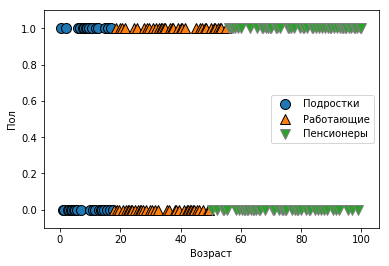

In [90]:
def person_category(age, sex):
    if (sex and 18 <= age <= 55) or (not sex and 18 <= age <= 50):
        return 1
    elif age < 18:
        return 0
    else:
        return 2
    
def make_sex(rng):
    return rng.randint(2) == 0

def make_age(it, max_it):
    return float(it + 1) * 100.0 / float(max_it)
    
def make_people(cnt, random_state):
    rng = np.random.RandomState(random_state)
    x_result = [[make_age(it, cnt), make_sex(rng)] for it in range(cnt)]
    y_result = [person_category(it[0], it[1]) for it in x_result]
    return np.array(x_result), np.array(y_result)

X, y = make_people(200, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Подростки", "Работающие", "Пенсионеры"], loc='best')
plt.xlabel("Возраст")
plt.ylabel("Пол")

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.960
Прогноз (0): [0]
Прогноз (1): [1]
Прогноз (1): [1]
Прогноз (2): [2]
Прогноз (2): [2]
Прогноз (1): [1]
Прогноз (2): [2]


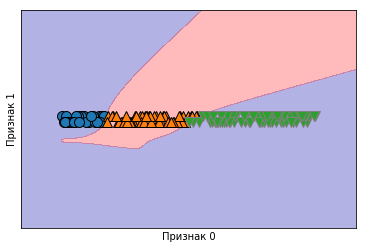

In [93]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[100, 100])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test, y_test)))

for age, sex in [[10, True], [19, True], [19, False], [56, True], [56, False], [51, True], [51, False]]:
    print("Прогноз ({}): {}".format(person_category(age, sex), mlp.predict([[age, sex]])))
